In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor*np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(0.0, 1.0, X_test.shape)

In [7]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

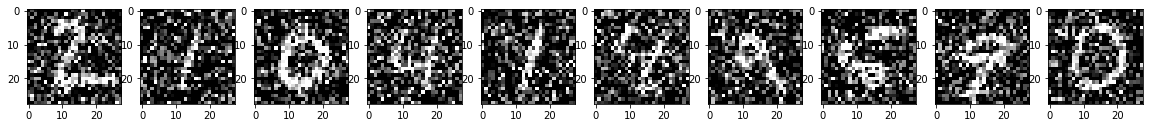

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

In [9]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [10]:
# encoder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
#(28, 28, 32)
x = MaxPool2D((2, 2))(x)
#(14, 14, 32)
x = Conv2D(32,(3, 3), activation='relu', padding='same')(x)
#(14, 14, 32)
encoded = MaxPool2D((2, 2))(x)
#(7, 7, 32)

In [ ]:
# decoder
x = Conv2D(32,(3, 3), activation='relu', padding='same')(encoded)
#(7, 7, 32)
x = UpSampling2D((2, 2))(x)
#(14, 14, 32)
x = Conv2D(32,(3, 3), activation='relu', padding='same')(x)
#(14, 14, 32)
x = UpSampling2D((2, 2))(x)
#(28, 28, 32)
x = Conv2D(1,(3, 3), activation='s', padding='same')(x)